# Task 1
Investigate at least 4 different clustering methods on the "CancerData.txt" data set.

Consider different dimension and feature selection techniques. Remember - it's a clustering task so you cannot select based on the class label!!!

Questions to focus on:

- Do the detected clusters overlap with the classes? Do some classes stand out?

- Do cluster selection methods (try at least 2) propose 3 clusters or more/fewer?

- How sensitive are any of the results above to how many features or reduced dimensions you use? and does this depend on which clustering method you use?

- How stable are the clustering results (investigate via resampling, consensus clustering etc)?


# Task 2a
Create cluster-irrelevant features in the data by e.g. perturbing features or replace with simulated noise features. Note, it is probably easier if you first filter out some cluster relevant features so you have an informative set to start from and keep these intact, but you are free to investigate the question of noisy features in other ways if you prefer.

Investigate how an increasing proportion of cluster-irrelevant features impact clustering and the selection of the number of clusters. Is this sensitive to how you choose to reduce dimensions or select features?

To make this interesting, explore at least 2-3 dimension reduction techniques. You can consider feature selection methods, projections, factorization methods or auto-encoders for example.

## Data preparation

In [15]:
import numpy as np

labels = list()

with open('Cancerdata.txt') as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        if i == 0:
            continue
        line = line.split('\t')
        line = [item.rstrip() for item in line]
        line[0] = float(line[0].strip('"'))
        line[1:] = [float(x) for x in line[1:]]
        line = np.asarray(line)
        
        # Append labels
        labels.append(int(line[1]))
        
        # Create the data np.array with first observation
        # Vstack the rest of the observations to the newly created data matrix
        observation = line[2:]
        if i == 1:
            data = observation
        else:
            data = np.vstack((data, observation))
        
labels = np.asarray(labels)

print(np.shape(labels))
print(np.shape(data))

(82,)
(82, 2999)


### Plot functions

In [16]:
def plot_true_vs_predict_2d(true_labels, predicted_labels, pca_component1=None, pca_component2=None):
    pca_component1 = 0 if pca_component1 is None else pca_component1
    pca_component2 = 1 if pca_component2 is None else pca_component2

    colors = ['red', '#7FFF00', 'blue']
    plt.figure(3)

    for i in u_labels:
        plt.scatter(principal_components_pca[predicted_labels == i , pca_component1] , principal_components_pca[predicted_labels == i , pca_component2] , label = i, color=colors[i])
        plt.scatter(principal_components_pca[true_labels == i , pca_component1] , principal_components_pca[true_labels == i , pca_component2] , label = i, marker="x", color=colors[i], zorder=5)

    plt.title('Plot of the real-label and kMean-label')
    plt.xlabel('Principal component ' + str(pca_component1+1))
    plt.ylabel('Principal component ' + str(pca_component2+1))

In [17]:
def plot_true_vs_predict_3d(true_labels, predicted_labels, pca_component1=None, pca_component2=None, pca_component3 = None):
    pca_component1 = 0 if pca_component1 is None else pca_component1
    pca_component2 = 1 if pca_component2 is None else pca_component2
    pca_component3 = 2 if pca_component3 is None else pca_component3

    colors = ['red', '#7FFF00', 'blue']
    fig = plt.figure()
    ax = fig.add_subplot(111, projection ='3d')


    for i in u_labels:
        plt.scatter(principal_components_pca[predicted_labels == i , pca_component1] , principal_components_pca[predicted_labels == i , pca_component2], principal_components_pca[predicted_labels == i , pca_component3] , label = i, color=colors[i])
        plt.scatter(principal_components_pca[true_labels == i , pca_component1] , principal_components_pca[true_labels == i , pca_component2], principal_components_pca[true_labels == i , pca_component3], label = i, marker="x", color=colors[i], zorder=5)

    plt.title('Plot of the real-label and kMean-label')
    plt.xlabel('Principal component ' + str(pca_component1+1))
    plt.ylabel('Principal component ' + str(pca_component2+1))

## Step 1

### Dimension and feature selection techniques suited for unsupervised clustering tasks

1. Principal Component Analysis (PCA)
2. Independent Component Analysis (ICA)
3. Random Projections
4. Feature Selection based on Clustering Quality
5. Recursive Feature Elimination (RFE)

Principal Component Analysis (PCA): PCA is a technique that reduces the dimensionality of the data by identifying the most important features that capture the most variance in the data. PCA is a powerful technique for feature selection, as it can often reduce the number of features required for clustering while still retaining the important information.

Independent Component Analysis (ICA): ICA is a technique that separates the data into independent sources based on statistical properties. ICA can be used for feature selection by identifying the features that have the most independent information, which can help to remove redundant or noisy features.

Random Projections: Random projections is a technique that can be used to reduce the dimensionality of the data by projecting the data onto a lower-dimensional subspace. Random projections can be used for feature selection by identifying the most important dimensions that capture the most variance in the data.

Feature Selection based on Clustering Quality: This approach selects the features that produce the best clustering results. This method works by selecting a subset of features and evaluating the clustering performance with different clustering algorithms, and selecting the subset of features that results in the best clustering performance.

Recursive Feature Elimination (RFE): RFE is a feature selection method that selects features by recursively considering smaller and smaller subsets of features. RFE works by training a model on the full set of features, ranking the importance of the features, and then eliminating the least important feature. This process is repeated until a predetermined number of features is reached.

## PCA

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


data_pp = StandardScaler().fit_transform(data)
pca = PCA(svd_solver="auto").fit(data_pp)
# The PCA object offers convenient ways of accessing the
# principal directions and explained variance
pca.components_;
pca.explained_variance_;

# To get the principal components, the `transform` method of the
# PCA object can be used
principal_components_pca = pca.transform(data_pp)

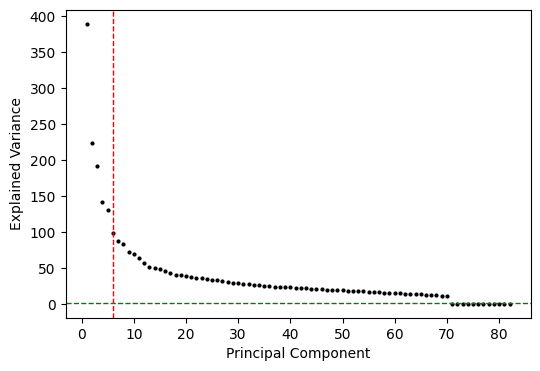

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 4))
ax = fig.gca()

ax.plot(np.arange(1, len(pca.components_) + 1), pca.explained_variance_, 'ok', markersize=2)
ax.axvline(6, linestyle="dashed", color="red", linewidth=1)
ax.axhline(1, linestyle="dashed", color="green", linewidth=1)

ax.set_xlabel("Principal Component")
ax.set_ylabel("Explained Variance");

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def pca(data, n_components):
    # Scale the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    
    # Fit PCA to the scaled data
    pca = PCA(n_components=n_components)
    pca.fit(scaled_data)
    
    # Transform the data using the fitted PCA model
    principal_components = pca.transform(scaled_data)
    
    # Return the principal components and explained variance ratio
    return principal_components

### Random projection

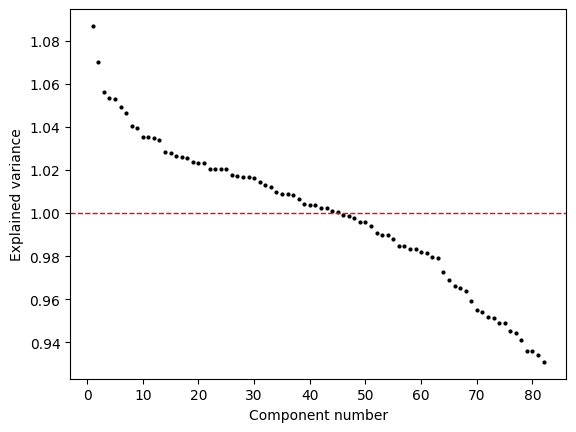

Number of components = 45


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.random_projection import GaussianRandomProjection

rp = GaussianRandomProjection(n_components=82).fit(data)

# Compute the explained variance ratio for each component
explained_variances = np.abs(rp.components_).var(axis=1) / np.abs(rp.components_).var().sum()

# Sort the components based on their explained variance
sorted_indices = np.argsort(explained_variances)[::-1]
explained_variances_sorted = explained_variances[sorted_indices]# Compute the explained variance ratio for each component
explained_variances = np.abs(rp.components_).var(axis=1) / np.abs(rp.components_).var().sum()

# Sort the components based on their explained variance
sorted_indices = np.argsort(explained_variances)[::-1]
explained_variances_sorted = explained_variances[sorted_indices]

# Plot the scree plot
plt.plot(np.arange(1, len(explained_variances) + 1), explained_variances_sorted, 'ok',markersize=2)
plt.axhline(1, linestyle="dashed", color="red", linewidth=1)
plt.xlabel('Component number')
plt.ylabel('Explained variance')
plt.show()

n_components = np.sum(explained_variances_sorted > 1)
print(f'Number of components = {n_components}')

In [22]:
def random_projection(data, nr_components):
    scaled_data = StandardScaler().fit_transform(data)
    return GaussianRandomProjection(n_components=nr_components).fit_transform(scaled_data)
    

In [23]:
nr_components_list = [5, 10, 20, 30]
nr_clusters_list = [1, 2, 3, 4, 5]
#Calinski-harbaz score
#Davies-Bouldin

def crossval(fun, nr_clusters_list, nr_components_list):
    for component in nr_components_list:
        reduced_data = pca(data, component)
        for cluster in nr_clusters_list:
            if fun == 'kmeans':
                score, pred_label = kmeans_clustering_cvscore(reduced_data, cluster)
            elif fun == 'spectral':
                score = spectral_cvscore(reduced_data, cluster)
            print(score)
    return pred_label

## Clustering methods

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import SpectralClustering

def kmeans_clustering_cvscore(reduced_data, nr_clusters, score):
    kmeans = KMeans(init="k-means++", n_clusters=nr_clusters, n_init='auto').fit(reduced_data)
    pred = kmeans.labels_
    if score == 'silh':
        score = silhouette_score(reduced_data, pred, metric='euclidean')
    elif score == 'calinski':
        score = calinski_harabasz_score(reduced_data, pred)
    elif score == 'davies':
        score = davies_bouldin_score(reduced_data, pred)
    return score, pred

def spectral_cvscore(reduced_data, nr_clusters, score):
    sc = SpectralClustering(n_clusters=nr_clusters, eigen_solver='lobpcg', n_init=10, gamma=1.0, affinity='nearest_neighbors',
                        n_neighbors=10, assign_labels='cluster_qr')
    pred = sc.fit_predict(reduced_data)
    if score == 'silh':
        score = silhouette_score(reduced_data, pred, metric='euclidean')
    elif score == 'calinski':
        score = calinski_harabasz_score(reduced_data, pred)
    elif score == 'davies':
        score = davies_bouldin_score(reduced_data, pred)
    return score, pred


def something_cvscore(reduced_data, nr_clusters, score):
    clf = ...
    pred = clf.fit_predict(reduced_data)
    if score == 'silh':
        score = silhouette_score(reduced_data, pred, metric='euclidean')
    elif score == 'calinski':
        score = calinski_harabasz_score(reduced_data, pred)
    elif score == 'davies':
        score = davies_bouldin_score(reduced_data, pred)
    return score, pred


def something_cvscore(reduced_data, nr_clusters, score):
    clf = ...
    pred = clf.fit_predict(reduced_data)
    if score == 'silh':
        score = silhouette_score(reduced_data, pred, metric='euclidean')
    elif score == 'calinski':
        score = calinski_harabasz_score(reduced_data, pred)
    elif score == 'davies':
        score = davies_bouldin_score(reduced_data, pred)
    return score, pred

    

In [25]:
from tqdm import trange
from tqdm import tqdm
import numpy as np

def evaluate(nr_PC, nr_clusters_list, data, method, iterations, metric):
    reduced_data = pca(data, nr_PC)
    cluster_dict = {}
    
    for c in nr_clusters_list:
        score_list = []
        for i in tqdm(range(iterations), desc=f"Number of clusters {c}", position=0):
            if method == 'kmeans':
                score, pred_label = kmeans_clustering_cvscore(reduced_data, c, metric)
            elif method == 'spectral':
                score, pred_label = spectral_cvscore(reduced_data, c, metric)
            score_list.append(score)
            
        cluster_dict[c] = np.mean(score_list)
    return cluster_dict, pred_label


***Taking out scores for the different metrics that depends on the nr of clusters***

In [27]:
# Function arguments
nr_clusters_list = [2, 3, 4, 5]
#nr_PC = [5, 10, 20, 30, 82]
nr_PC = 5
method = 'spectral'
iterations = 100

silhouette_score_dict, pred_label = evaluate(nr_PC, nr_clusters_list, data, method, iterations, 'silh')
print(f'Silhoutte scores for {method}:\n {silhouette_score_dict}')

calinski_score_dict, pred_label = evaluate(nr_PC, nr_clusters_list, data, method, iterations, 'calinski')
print(f'Calinski-Harabasz scores for {method}:\n {calinski_score_dict}')

davies_bouldin_dict, pred_label = evaluate(nr_PC, nr_clusters_list, data, method, iterations, 'davies')
print(f'Davies-Bouldin scores for {method}:\n {davies_bouldin_dict}')

Number of clusters 5: 100%|██████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 45.78it/s]


Silhoutte scores for spectral:
 {2: 0.15310796583790198, 3: 0.2488030279295225, 4: 0.2602678943695387, 5: 0.2796233972757279}


Number of clusters 5: 100%|██████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 47.90it/s]


Calinski-Harabasz scores for spectral:
 {2: 13.880086250634276, 3: 25.346989322545173, 4: 25.026580635760453, 5: 26.079168590481}


Number of clusters 5: 100%|██████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 44.01it/s]

Davies-Bouldin scores for spectral:
 {2: 1.751425265688066, 3: 1.37056906550852, 4: 1.4167120673193496, 5: 1.3173851560016434}


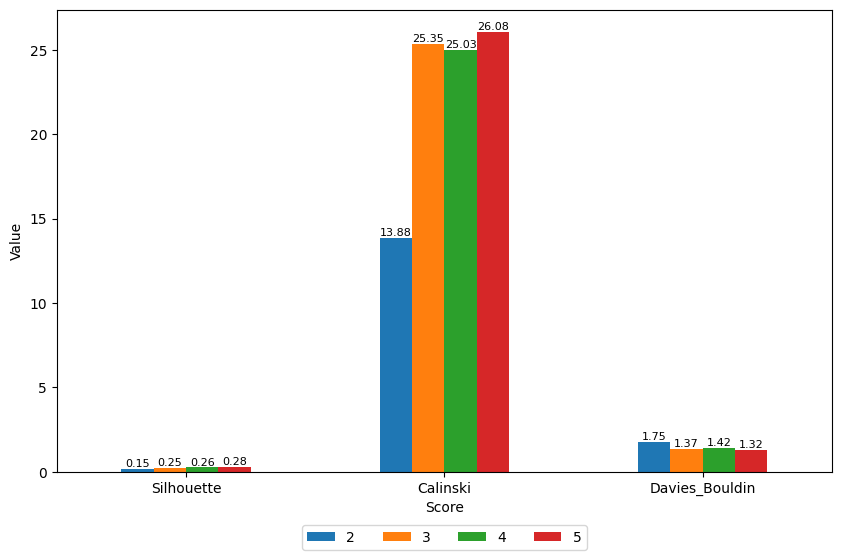

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
clfs_name = ['2', '3', '4', '5']
def barplot(score_values, score_names):
    df = pd.DataFrame(score_values, index=score_names, columns=clfs_name)
    ax = df.plot.bar(rot=0, figsize=(10,6))
    
    
    # Add score names below the bars
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(clfs_name))
    ax.set_xlabel('Score')
    ax.set_ylabel('Value')
    ax.set_xticklabels(score_names)
    
    # Add exact values above the bars
    for i in ax.containers:
        ax.bar_label(i, label_type='edge', fmt='%.2f', fontsize=8)
    
    plt.show()
        
score_values = [silhouette_score_dict.values(), calinski_score_dict.values(), davies_bouldin_dict.values()]
score_names = ['Silhouette', 'Calinski', 'Davies_Bouldin']
barplot(score_values, score_names)

***Investigate how sensitive the results are to the nr of principal components***

In [72]:
from collections import Counter
from collections import defaultdict

def pc_check(method, score_name):
    my_dict = defaultdict(list)
    nr_clusters_list = [2, 3, 4, 5]
    nr_PC = [5, 10, 20, 30, 82]
    iterations = 100

    for pc in nr_PC:
        score_dict, pred_label = evaluate(pc, nr_clusters_list, data, method, iterations, score_name)
        best_score = 0
        for key, val in score_dict.items():
            my_dict[key].append(val)
    return my_dict
cal_var = pc_check('kmeans','calinski')
print(cal_var)

Number of clusters 5: 100%|█████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 153.85it/s]

defaultdict(<class 'list'>, {2: [26.10034290030556, 17.435023849387406, 12.25119618010566, 10.085434572615442, 7.003198197198313], 3: [25.242531532478093, 15.259609533919383, 10.46468594788739, 8.437517698991178, 5.893342360658314], 4: [25.125822352697213, 14.458329960841697, 9.571988644622275, 7.591349381938151, 5.140913735159578], 5: [25.516631659219037, 13.97563416710046, 8.854774574740008, 7.0164449427821465, 4.666935832124784]})


In [73]:
print(np.var(cal_var[2]))

44.780341968412394


In [62]:
# creating a function that spits out all the variances for each clustering method in a dict for a specified score metric
def variances(cluster_methods:list, score_metric:str):
    variances = defaultdict(list)
    for method in cluster_methods:
        my_dict = pc_check(method,score_metric)
        for key, values in my_dict.items():
            variances[key].append(np.var(values))
    return variances
        
cluster_methods = ['kmeans', 'spectral']
silhoutte_variances = variances(cluster_methods, 'silh')
calinski_variances = variances(cluster_methods, 'calinski')
davies_variances = variances(cluster_methods, 'davies')

Number of clusters 2:   0%|                                                                    | 0/100 [00:00<?, ?it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
Number of clusters 2:  16

C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
Number of clusters 2:  39%|███████████████████████                                    | 39/100 [00:00<00:01, 51.54it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
Number of clusters 2:  63%|█████████████████████████████████████▏                     | 63/100 [00:01<00:00, 52.83it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 2:  87%|███████████████████████████████████████████████████▎       | 87/100 [00:01<00:00, 52.41it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
Number of clusters 3:  12%|███████                                                    | 12/100 [00:00<00:02, 38.97it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
Number of clusters 3:  38%|██████████████████████▍                                    | 38/100 [00:00<00:01, 38.88it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
Number of clusters 3:  62%|████████████████████████████████████▌                      | 62/100 [00:01<00:00, 38.28it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
Number of clusters 3:  88%|███████████████████████████████████████████████████▉       | 88/100 [00:02<00:00, 38.92it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
Number of clusters 4:  12%|███████                                                    | 12/100 [00:00<00:02, 37.10it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 4:  36%|█████████████████████▏                                     | 36/100 [00:00<00:01, 36.24it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 4:  60%|███████████████████████████████████▍                       | 60/100 [00:01<00:01, 34.48it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 4:  85%|██████████████████████████████████████████████████▏        | 85/100 [00:02<00:00, 35.99it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 5:   8%|████▊                                                       | 8/100 [00:00<00:02, 31.73it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 5:  32%|██████████████████▉                                        | 32/100 [00:01<00:02, 30.95it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 5:  56%|█████████████████████████████████                          | 56/100 [00:01<00:01, 30.91it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 5:  80%|███████████████████████████████████████████████▏           | 80/100 [00:02<00:00, 31.92it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 2:   0%|                                                                    | 0/100 [00:00<?, ?it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 2:  18%|██████████▌                                                | 18/100 [00:00<00:01, 55.01it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 2:  42%|████████████████████████▊                                  | 42/100 [00:00<00:01, 54.55it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 2:  66%|██████████████████████████████████████▉                    | 66/100 [00:01<00:00, 53.65it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 2:  90%|█████████████████████████████████████████████████████      | 90/100 [00:01<00:00, 54.77it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
Number of clusters 3:  16%|█████████▍                                                 | 16/100 [00:00<00:02, 38.22it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 3:  39%|███████████████████████                                    | 39/100 [00:01<00:01, 38.95it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 3:  64%|█████████████████████████████████████▊                     | 64/100 [00:01<00:00, 39.44it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
Number of clusters 3:  90%|█████████████████████████████████████████████████████      | 90/100 [00:02<00:00, 39.61it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 4:  12%|███████                                                    | 12/100 [00:00<00:02, 36.18it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 4:  36%|█████████████████████▏                                     | 36/100 [00:00<00:01, 36.33it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 4:  60%|███████████████████████████████████▍                       | 60/100 [00:01<00:01, 36.25it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 4:  84%|█████████████████████████████████████████████████▌         | 84/100 [00:02<00:00, 36.15it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
Number of clusters 5:   8%|████▊                                                       | 8/100 [00:00<00:02, 31.67it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 5:  32%|██████████████████▉                                        | 32/100 [00:00<00:02, 32.40it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 5:  56%|█████████████████████████████████                          | 56/100 [00:01<00:01, 31.16it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 5:  80%|███████████████████████████████████████████████▏           | 80/100 [00:02<00:00, 31.18it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 2:   0%|                                                                    | 0/100 [00:00<?, ?it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 2:  18%|██████████▌                                                | 18/100 [00:00<00:01, 52.79it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 2:  42%|████████████████████████▊                                  | 42/100 [00:00<00:01, 52.96it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 2:  66%|██████████████████████████████████████▉                    | 66/100 [00:01<00:00, 53.05it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 2:  90%|█████████████████████████████████████████████████████      | 90/100 [00:01<00:00, 52.87it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 3:  14%|████████▎                                                  | 14/100 [00:00<00:02, 39.18it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 3:  38%|██████████████████████▍                                    | 38/100 [00:00<00:01, 37.87it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 3:  62%|████████████████████████████████████▌                      | 62/100 [00:01<00:01, 37.94it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 3:  88%|███████████████████████████████████████████████████▉       | 88/100 [00:02<00:00, 38.00it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 4:  12%|███████                                                    | 12/100 [00:00<00:02, 35.96it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 4:  36%|█████████████████████▏                                     | 36/100 [00:01<00:01, 35.85it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 4:  60%|███████████████████████████████████▍                       | 60/100 [00:01<00:01, 35.53it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 4:  84%|█████████████████████████████████████████████████▌         | 84/100 [00:02<00:00, 35.93it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
Number of clusters 5:   8%|████▊                                                       | 8/100 [00:00<00:02, 31.35it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
Number of clusters 5:  32%|██████████████████▉                                        | 32/100 [00:01<00:02, 29.89it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
Number of clusters 5:  56%|█████████████████████████████████                          | 56/100 [00:01<00:01, 30.46it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

Number of clusters 5:  80%|███████████████████████████████████████████████▏           | 80/100 [00:02<00:00, 31.25it/s]C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\axelq\OneDrive\Skrivbord\MpCas\Statistical learning for big data\bigdatavenv1\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matr

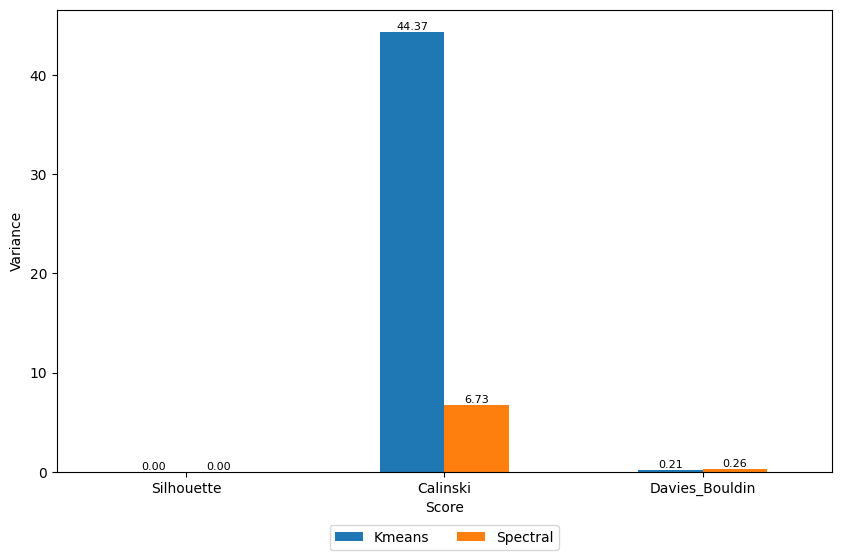

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
clfs_name = ['Kmeans', 'Spectral']
def barplot(score_values, score_names):
    df = pd.DataFrame(score_values, index=score_names, columns=clfs_name)
    ax = df.plot.bar(rot=0, figsize=(10,6))
    
    
    # Add score names below the bars
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(clfs_name))
    ax.set_xlabel('Score')
    ax.set_ylabel('Variance')
    ax.set_xticklabels(score_names)
    
    # Add exact values above the bars
    for i in ax.containers:
        ax.bar_label(i, label_type='edge', fmt='%.2f', fontsize=8)
    
    plt.show()
        
score_values = [silhoutte_variances[2], calinski_variances[2], davies_variances[2]]
score_names = ['Silhouette', 'Calinski', 'Davies_Bouldin']
barplot(score_values, score_names)